# CodeSoft Machine Learning Internship 

## Movie Genere Recommendation 

Create a machine learning model that can predict the genre of a
movie based on its plot summary or other textual information. You
can use techniques like TF-IDF or word embeddings with classifiers
such as Naive Bayes, Logistic Regression, or Support Vector Machines.

DATASET [CLICK HERE](https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb)

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report

# Function to load data

In [4]:
def load_data(path):
    data = pd.read_csv(path, sep=":::", names=["ID", "Title", "Genre", "Plot"], engine="python")
    data.drop(columns=["ID"], inplace=True)
    return data


# Loading the training data

In [5]:
df = load_data("C:\\Users\\rishi\\Downloads\\ML INTERNSHIP\\Movie Genre Classification\\data\\train_data.txt")

# Exploring the data

In [6]:
df.shape

(54214, 3)

In [7]:
# Checking for null values

In [8]:
df.head()

,Title,Genre,Plot
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [9]:
df.describe()


,Title,Genre,Plot
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   54214 non-null  object
 1   Genre   54214 non-null  object
 2   Plot    54214 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [11]:
null_values = df.isnull().sum()

# Visualizing genre distribution

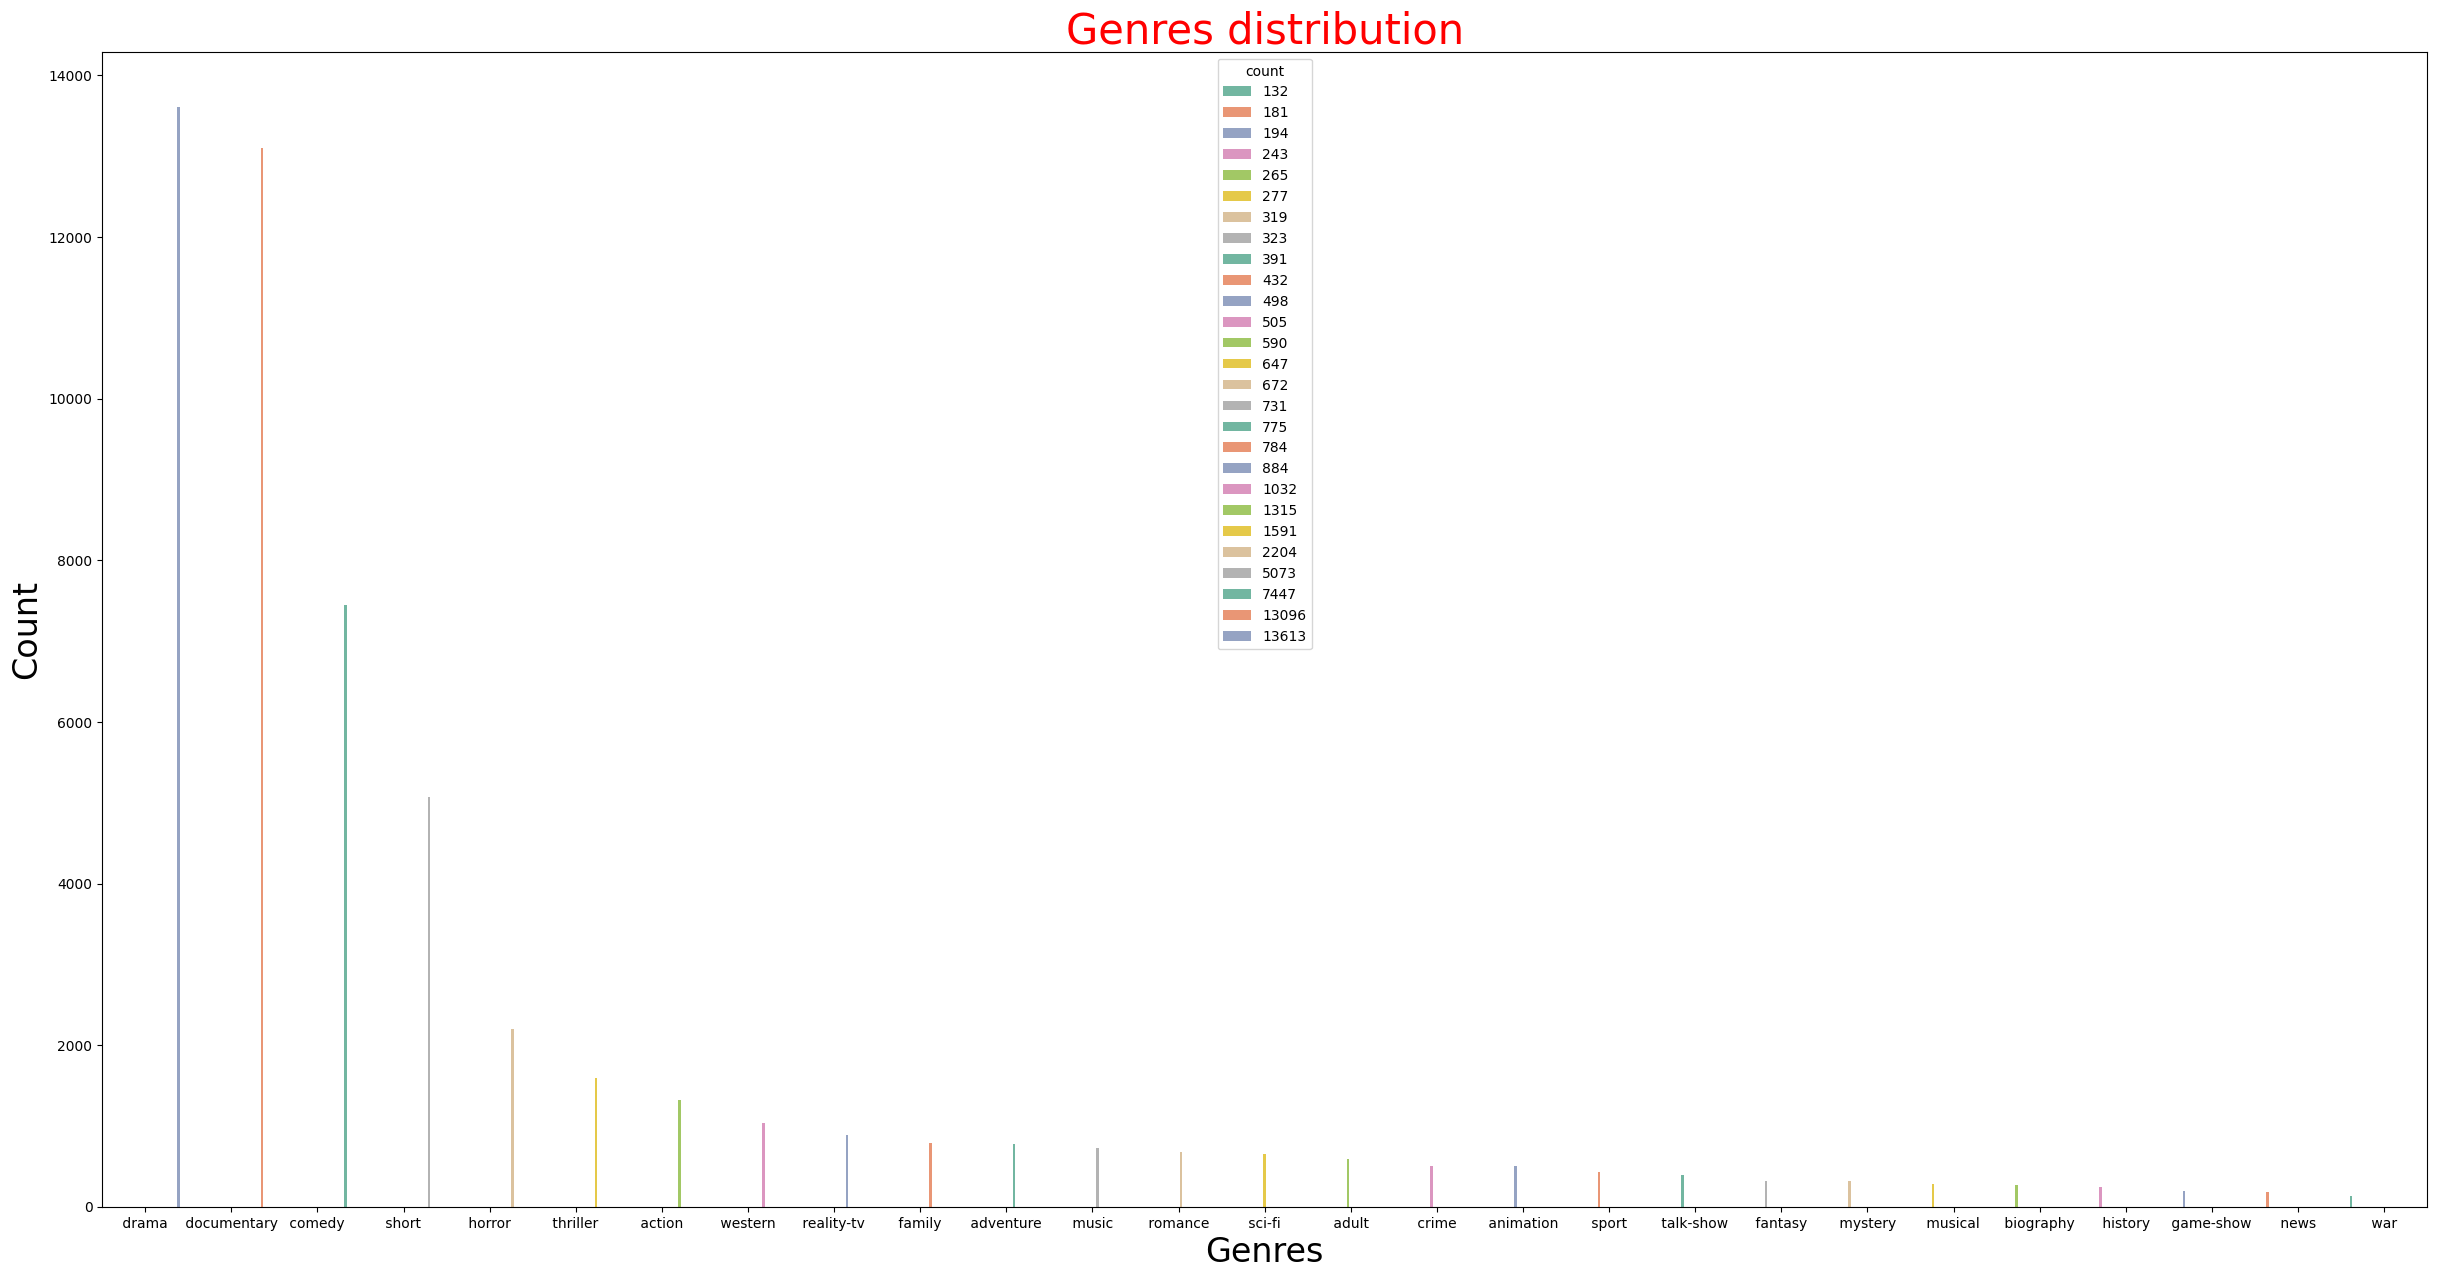

In [12]:
genres = df['Genre'].value_counts()
plt.figure(figsize=(30,15))
sns.barplot(x=genres.index, y=genres, palette="Set2", hue=genres)
plt.title("Genres distribution", fontsize=30, c='r')
plt.xlabel("Genres", fontsize=24)
plt.ylabel("Count", fontsize=24)
plt.show()

# Data Preprocessing

In [13]:
vectorizer = TfidfVectorizer()


In [14]:
plot_samples = df['Plot'][0:2]
clean_plots = [re.sub(r'[^a-zA-Z\s]+', '', plot.lower().strip()) for plot in plot_samples]
stop_words = set(stopwords.words('english'))
clean_plots = [' '.join([word for word in plot.split() if word.lower() not in stop_words]) for plot in clean_plots]


In [15]:
def clean_plot(plot):
    plot = plot.lower()
    plot = re.sub(r'[^a-zA-Z\s]+', '', plot).strip()
    stop_words = set(stopwords.words('english'))
    plot = ' '.join([word for word in plot.split() if word.lower() not in stop_words])
    return plot

In [16]:
df['Clean Plot'] = df['Plot'].apply(clean_plot)

# TF-IDF vectorizer

In [17]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(df['Clean Plot'])
y_train = df['Genre']


In [18]:
test_data = load_data("data/test_data_solution.txt")
test_data['Clean Plot'] = test_data['Plot'].apply(clean_plot)
X_test = vectorizer.transform(test_data['Clean Plot'])
y_test = test_data['Genre']

# Naive Bayes Classifier

In [19]:
model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)
y_pred_NB = model_NB.predict(X_test)
accuracy_NB = accuracy_score(y_test, y_pred_NB)

# Logistic Regression Classifier

In [20]:

model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)
accuracy_LR = accuracy_score(y_test, y_pred_LR)

# Random Forest Classifier

In [21]:

model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred_RF)

# Print the accuracies

In [22]:

print("Accuracy of Multinomial Naive Bayes Classifier:", accuracy_NB)
print("Accuracy of Logistic Regression Classifier:", accuracy_LR)
print("Accuracy of Random Forest Classifier:", accuracy_RF)


Accuracy of Multinomial Naive Bayes Classifier: 0.44359778597785976
Accuracy of Logistic Regression Classifier: 0.5891881918819188
Accuracy of Random Forest Classifier: 0.48612546125461253


# Classification Reports

In [23]:
print("\nClassification Report of Multinomial Naive Bayes Classifier:")
print(classification_report(y_test, y_pred_NB, zero_division=1))
print("\nClassification Report of Logistic Regression Classifier:")
print(classification_report(y_test, y_pred_LR, zero_division=1))
print("\nClassification Report of Random Forest Classifier:")
print(classification_report(y_test, y_pred_RF, zero_division=1))



Classification Report of Multinomial Naive Bayes Classifier:
               precision    recall  f1-score   support

      action        1.00      0.00      0.00      1314
       adult        1.00      0.00      0.00       590
   adventure        1.00      0.00      0.00       775
   animation        1.00      0.00      0.00       498
   biography        1.00      0.00      0.00       264
      comedy        0.73      0.04      0.07      7446
       crime        1.00      0.00      0.00       505
 documentary        0.53      0.90      0.67     13096
       drama        0.38      0.88      0.53     13612
      family        1.00      0.00      0.00       783
     fantasy        1.00      0.00      0.00       322
   game-show        1.00      0.00      0.00       193
     history        1.00      0.00      0.00       243
      horror        1.00      0.00      0.00      2204
       music        1.00      0.00      0.00       731
     musical        1.00      0.00      0.00       276
  